# Wine Dataset

## จัดทำโดย ชโลธร ชวลิตชีวินกุล 5920411001

จาก Link https://archive.ics.uci.edu/ml/datasets/wine

### Data Set Information:

Abstract: Using chemical analysis determine the origin of wines
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set. 

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it ) 
- 1) Alcohol 
- 2) Malic acid 
- 3) Ash 
- 4) Alcalinity of ash 
- 5) Magnesium 
- 6) Total phenols 
- 7) Flavanoids 
- 8) Nonflavanoid phenols 
- 9) Proanthocyanins 
- 10)Color intensity 
- 11)Hue 
- 12)OD280/OD315 of diluted wines 
- 13)Proline 

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.


Attribute Information:
All attributes are continuous 

No statistics available, but suggest to standardise variables for certain uses (e.g. for us with classifiers which are NOT scale invariant) 

NOTE: 1st attribute is class identifier (1-3)


### เป้าหมายการทำ
- Classification 3 แบบเทียบกัน
- K-mean



In [1]:
#Importing required packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#ทดสอบลอง ดูข้อมูลที่ดึงมา
Prep_Wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')


In [3]:
Prep_Wine.head() # เรียกตัวอย่าง 5 แถวแรก เพื่อดูคร่าวๆว่าข้อมูลเป็นอย่างไร

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


# รายละเอียด

จาก Note ที่เค้าบอกว่า 1st attribute is class identifier (1-3)
จากนั้น attribute 2 ถึง 14 เป็น 13 variables ที่เหลือ

In [4]:
'''
0) Wine Class ->  WineClass
1) Alcohol -> Alcohol
2) Malic acid -> MalicAcid
3) Ash -> Ash
4) Alcalinity of ash -> AshAlcalinity
5) Magnesium -> Magnesium
6) Total phenols -> TotalPhenols
7) Flavanoids -> Flavanoids
8) Nonflavanoid phenols  ->NonflavanoidPhenols
9) Proanthocyanins -> Proanthocyanins
10)Color intensity -> ColorIntensity
11)Hue -> Hue
12)OD280/OD315 of diluted wines ->DilutedWines
13)Proline -> Proline
'''
#ดึงข้อมูลใหม่ เพื่อนำมาใส่ column header ตาม attribute ที่มีให้
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data" , delimiter=',' 
                        , skipinitialspace=True, header=None
                        , names = ["WineClass", "Alcohol", "MalicAcid", "Ash", "AshAlcalinity", 
                "Magnesium", "TotalPhenols", "Flavanoids", "NonflavanoidPhenols", "Proanthocyanins", 
                                   "ColorIntensity", "Hue", "DilutedWines", "Proline"])

In [5]:
data

,WineClass,Alcohol,MalicAcid,Ash,AshAlcalinity,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [6]:
#ดูรายละเอียดของข้อมูล ในdata frame เพื่อดูว่ามีความผิดพลาดอะไรใน dataset หรือไม่
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
WineClass              178 non-null int64
Alcohol                178 non-null float64
MalicAcid              178 non-null float64
Ash                    178 non-null float64
AshAlcalinity          178 non-null float64
Magnesium              178 non-null int64
TotalPhenols           178 non-null float64
Flavanoids             178 non-null float64
NonflavanoidPhenols    178 non-null float64
Proanthocyanins        178 non-null float64
ColorIntensity         178 non-null float64
Hue                    178 non-null float64
DilutedWines           178 non-null float64
Proline                178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
#หาประเภทของ Wine ซึ่งแบ่งได้เป็น 3 ประเภท คือ ประเภท 1, 2 และ 3
data['WineClass'].unique().tolist()

[1, 2, 3]

In [8]:
#ดังนั้น ต้องเปลี่ยนชนิดของข้อมูล WineClass ให้เป็น string แทน integer
data['WineClass']= data['WineClass'].astype(str)

In [9]:
# เช็คชนิดของข้อมูล WineClass  ดูว่าค่าของ WineClass นั้นเปลี่ยนเป็น string แล้วหรือยัง
data.dtypes

WineClass               object
Alcohol                float64
MalicAcid              float64
Ash                    float64
AshAlcalinity          float64
Magnesium                int64
TotalPhenols           float64
Flavanoids             float64
NonflavanoidPhenols    float64
Proanthocyanins        float64
ColorIntensity         float64
Hue                    float64
DilutedWines           float64
Proline                  int64
dtype: object

In [10]:
# เมื่อข้อมูล Class WineClass โดนเปลี่ยนเป็น string แล้ว ก็ให้เพิ่มคำว่า "Class อยู่หน้าค่าที่เป็นตัวเลข"
data['WineClass'] = 'Class ' + data['WineClass'] 

In [11]:
#ตรวจสอบข้อมูลที่เป็น unique ของ  WineClass
data['WineClass'].unique().tolist()

['Class 1', 'Class 2', 'Class 3']

In [12]:
# เปิดดูข้อมูลใน dataframe
data.describe()

,Alcohol,MalicAcid,Ash,AshAlcalinity,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


# EDA
กระบวนการ Exploratory data analysis สำหรับการสำรวจข้อมูลใน dataframe ว่ามีลักษณะอย่างไร มีความสัมพันธ์กันระหว่าง variable ด้วยกันอย่างไร

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


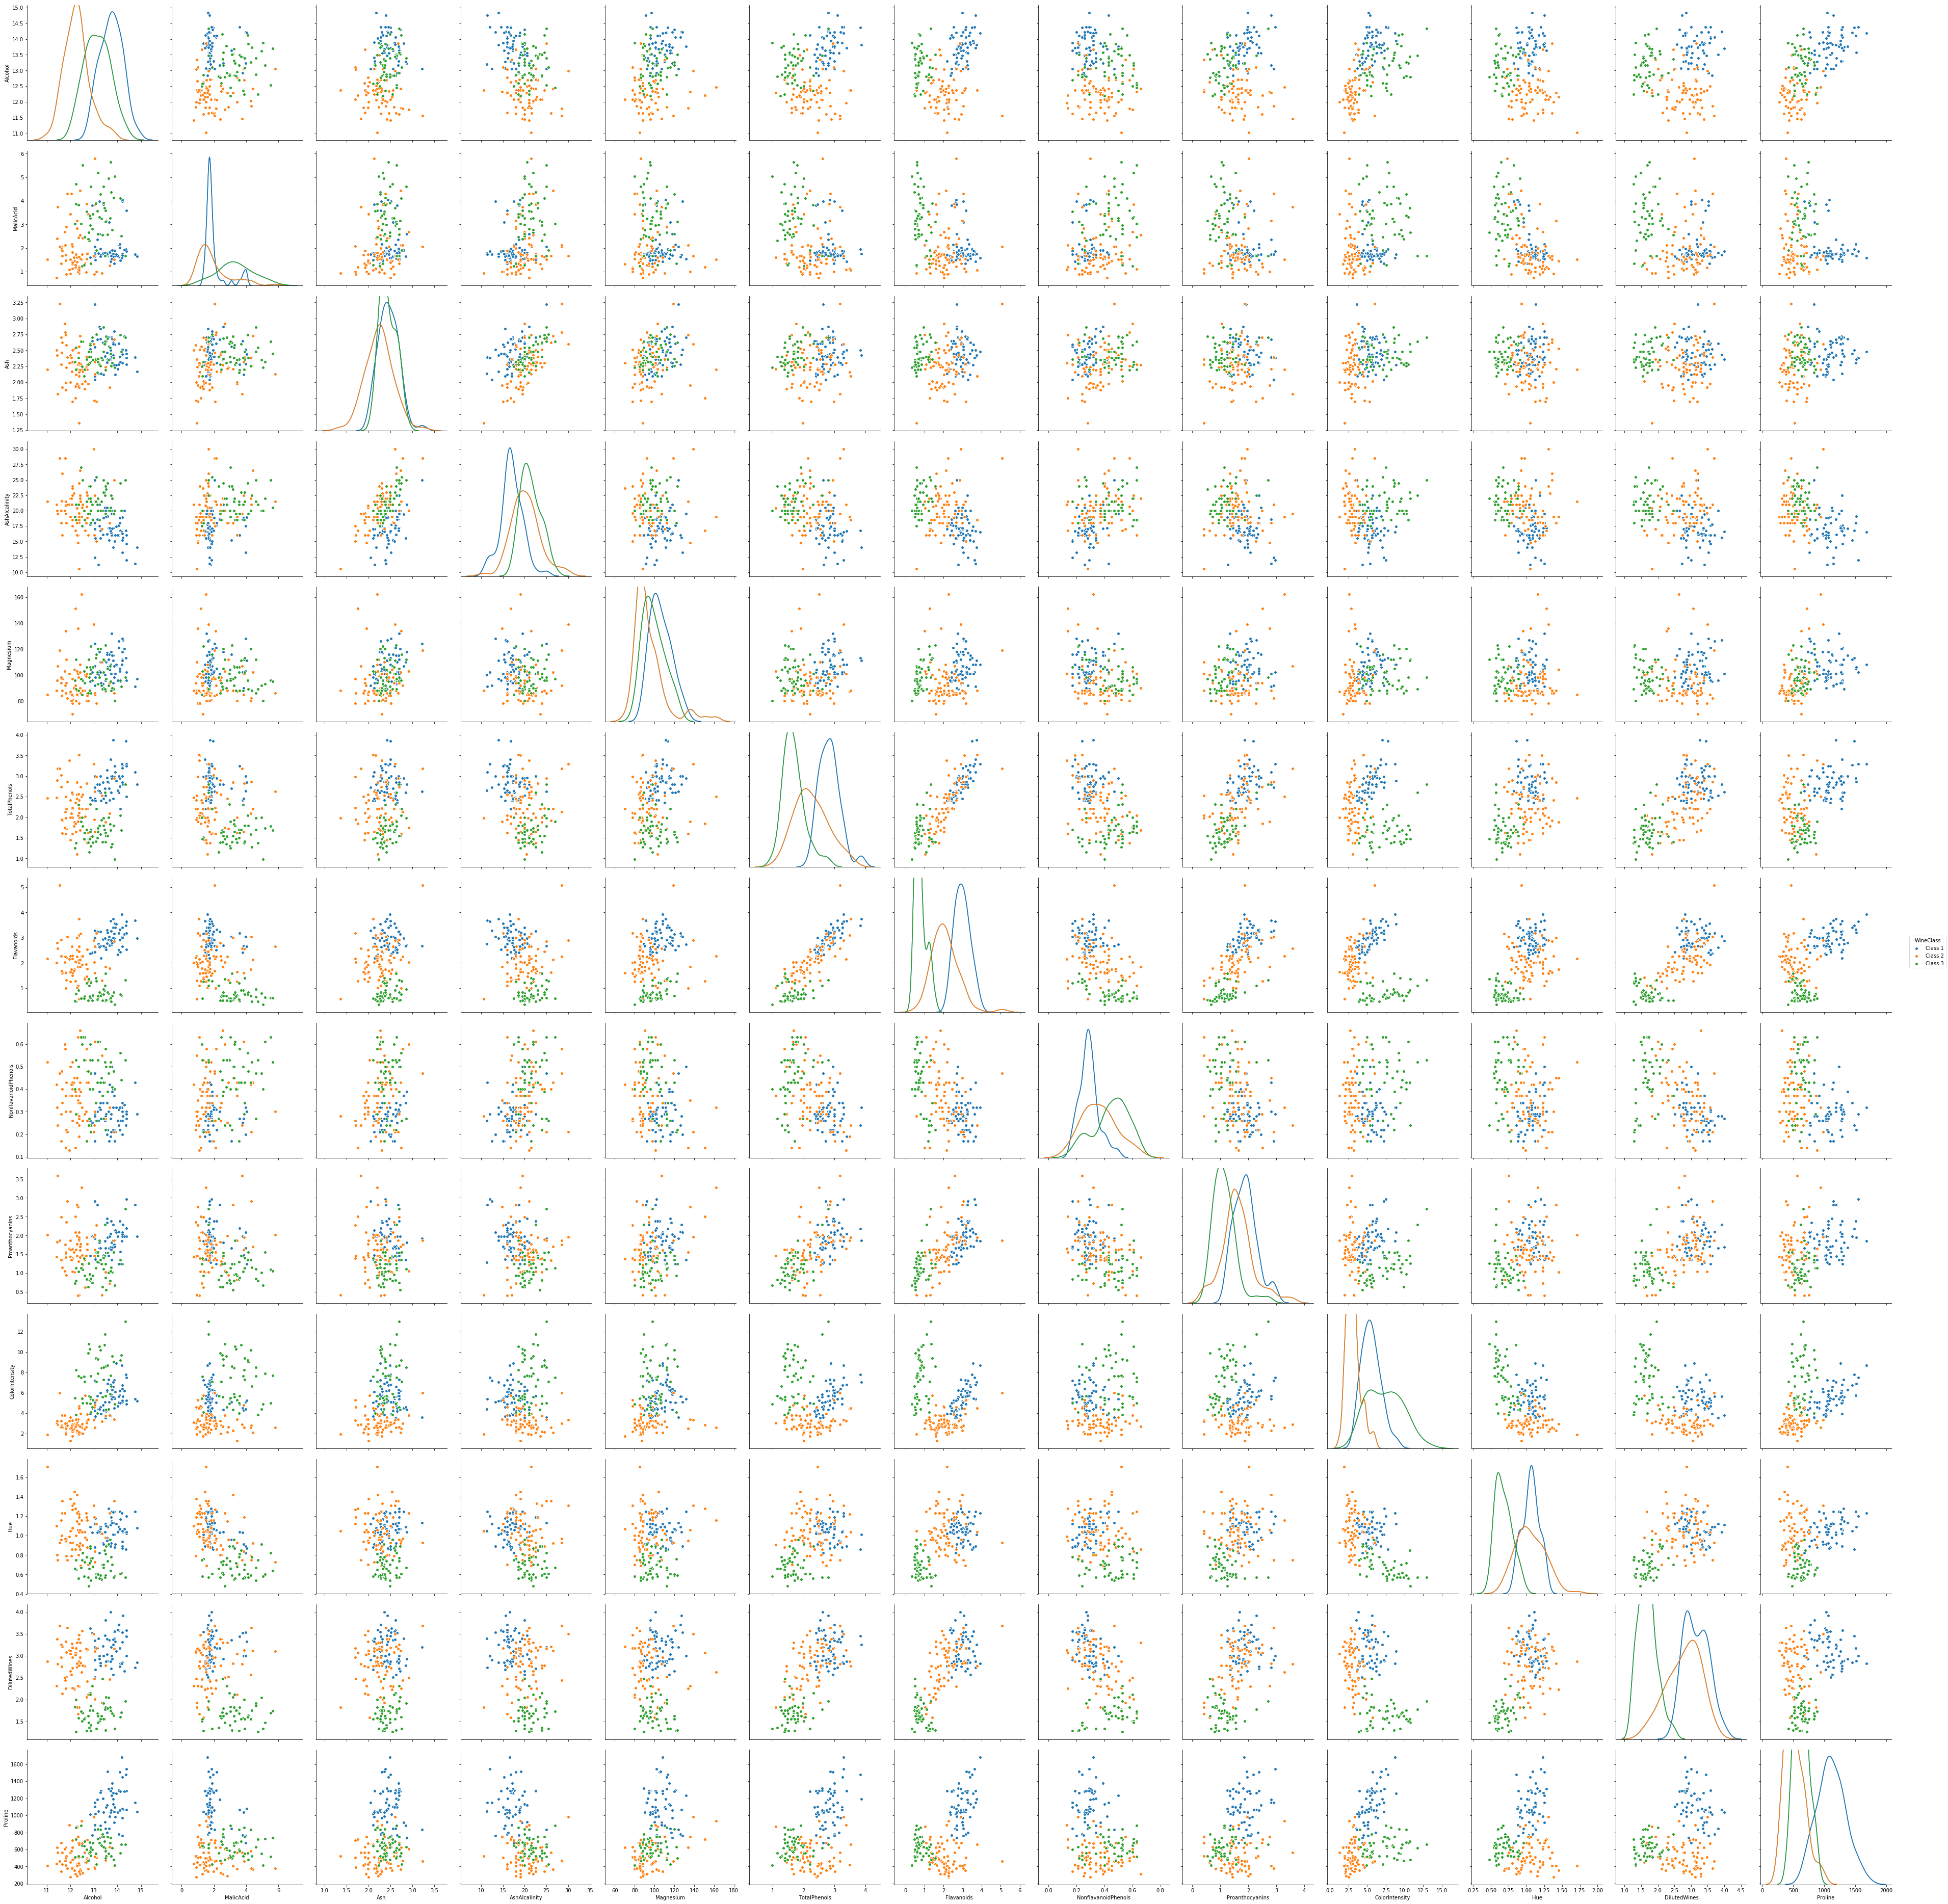

In [13]:
# แสดง correlation  ระหว่าง variable
g = sns.pairplot(data, hue="WineClass", size=4, diag_kind="kde")

def f(x, **kwargs):
    kwargs.pop("color")
    col = next(plt.gca()._get_lines.prop_cycler)['color']
    sns.kdeplot(x, color=col, **kwargs)
    
g.map_diag(f)    
plt.show()

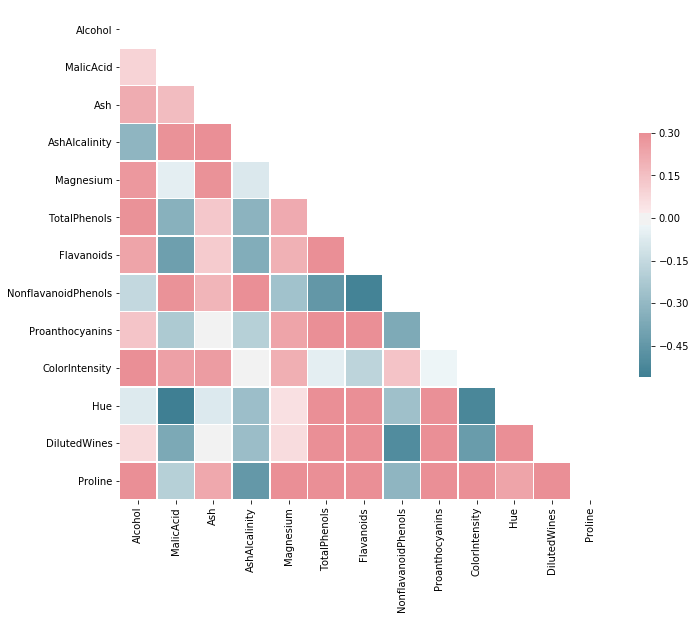

In [14]:
# ตารางหาความสัมพันธ์ ของ ตัวแปรต่างๆ


# Compute the correlation matrix

numeric_features = ["Alcohol", "MalicAcid", "Ash", "AshAlcalinity", 
                "Magnesium", "TotalPhenols", "Flavanoids", "NonflavanoidPhenols", "Proanthocyanins", 
                                   "ColorIntensity", "Hue", "DilutedWines", "Proline"]

#g = sns.heatmap(data[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
#plt.show()

corr = data[numeric_features].corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

สังเกตได้ว่า 

In [15]:
corr

,Alcohol,MalicAcid,Ash,AshAlcalinity,Magnesium,TotalPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
MalicAcid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
AshAlcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
TotalPhenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
NonflavanoidPhenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
ColorIntensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


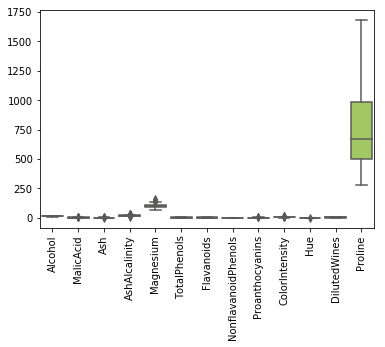

In [16]:
# ดูภาพรวมของตัวแปล

ax = sns.boxplot(data=data[numeric_features], orient="v", palette="Set2")
plt.xticks(rotation=90)
plt.show()

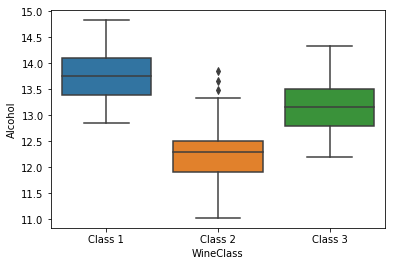

In [17]:
#ในส่วนนี้เป็นการเทียบค่าระหว่าง Alcohol และ  ประเทของ Wine
g =sns.boxplot(x="WineClass", y="Alcohol", data=data)

plt.show()

https://jonathonbechtel.com/blog/2018/02/06/wines/

In [18]:

#sns.distplot(data['Alcohol'],kde=0)


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


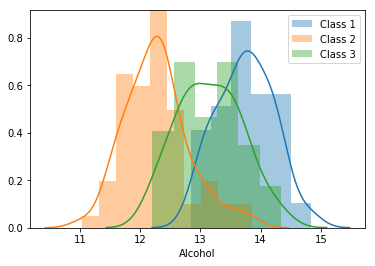

In [19]:
sns.distplot(data['Alcohol'][data.WineClass=="Class 1"], kde=1,label='{}'.format("Class 1"))
sns.distplot(data['Alcohol'][data.WineClass=="Class 2"], kde=1,label='{}'.format("Class 2"))
sns.distplot(data['Alcohol'][data.WineClass=="Class 3"], kde=1,label='{}'.format("Class 3"))
plt.legend()

Alcohol


/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


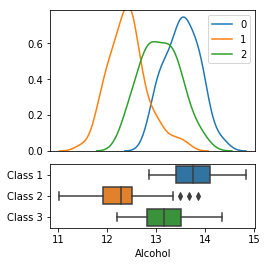

MalicAcid


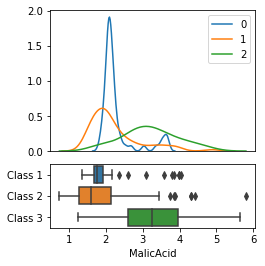

Ash


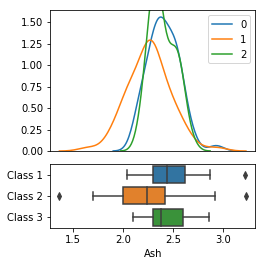

AshAlcalinity


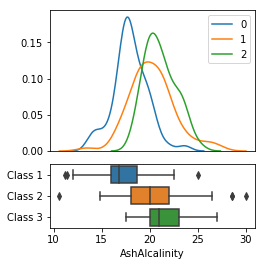

Magnesium


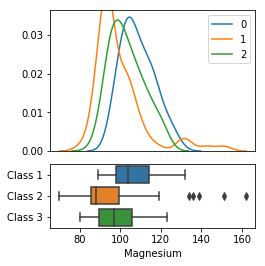

TotalPhenols


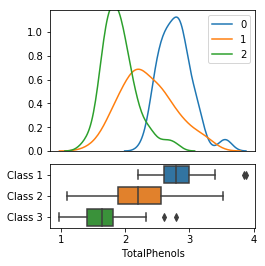

Flavanoids


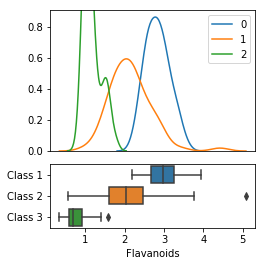

NonflavanoidPhenols


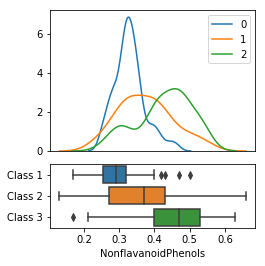

Proanthocyanins


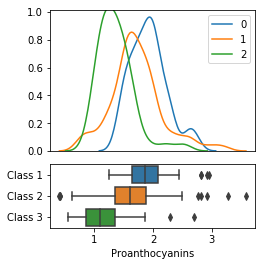

ColorIntensity


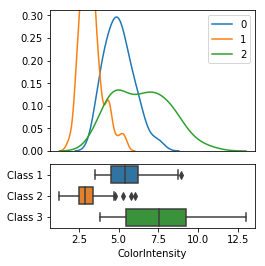

Hue


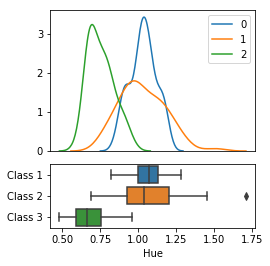

DilutedWines


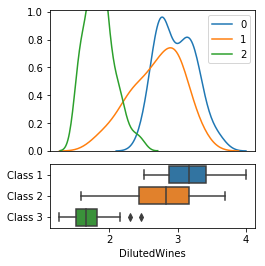

Proline


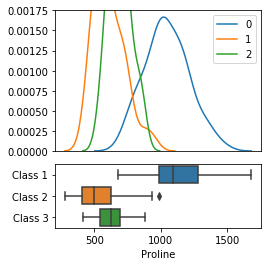

In [20]:
# แสดงลักษณะของข้อมูลในแต่ละ attribute
import matplotlib.gridspec as gridspec
for feature in numeric_features:
    print(feature)
    #sns.boxplot(data=data,x=data.target,y=data[feature])
    gs1 = gridspec.GridSpec(3,1)
    ax1 = plt.subplot(gs1[:-1])
    ax2 = plt.subplot(gs1[-1])
    gs1.update(right=0.60)
    sns.boxplot(x=feature,y='WineClass',data=data,ax=ax2)
    sns.kdeplot(data[feature][data.WineClass=="Class 1"],ax=ax1,label='0')
    sns.kdeplot(data[feature][data.WineClass=="Class 2"],ax=ax1,label='1')
    sns.kdeplot(data[feature][data.WineClass=="Class 3"],ax=ax1,label='2')
    ax2.yaxis.label.set_visible(False)
    ax1.xaxis.set_visible(False)
    plt.show()

# Split Data

In [21]:
# การเทรนจะแบ่งข้อมูลเป็น 80% และ 20%

from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = \
    train_test_split(data[numeric_features],data['WineClass'],
                     test_size=0.2)
    
print(len(data_train),' samples in training data\n',
      len(data_test),' samples in test data\n', )

142  samples in training data
 36  samples in test data



# Classification Model
การเลือกโมเดล ซึ่งจะใช้โมเดล Logistic Regression Nearest Neighbors และ Naive Bayes



In [22]:
## Model
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process.kernels import RBF
from sklearn.cluster import KMeans

dict_classifiers = {
    "Logistic Regression": 
            {'classifier': LogisticRegression(),
                'params' : [
                            {
                             'penalty': ['l1','l2'],
                             'C': [0.001,0.01,0.1,1,10,100,1000]
                            }
                           ]
            },
    "Nearest Neighbors": 
            {'classifier': KNeighborsClassifier(),
                 'params': [
                            {
                            'n_neighbors': [1, 3, 5, 10],
                            'leaf_size': [3, 30]
                            }
                           ]
            },
             
    "Naive Bayes": 
            {'classifier': GaussianNB(),
                 'params': {}
            }
    
}

In [23]:
from sklearn.model_selection import learning_curve 
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.6, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [24]:
import time
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
num_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, X_test, Y_test, verbose = True):
    df_results = pd.DataFrame(
        data=np.zeros(shape=(num_classifiers,4)),
        columns = ['classifier',
                   'train_score', 
                   'test_score',
                   'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        grid = GridSearchCV(classifier['classifier'], 
                      classifier['params'],
                      refit=True,
                        cv = 10, # 9+1
                        scoring = 'accuracy', # scoring metric
                        n_jobs = -1
                        )
        estimator = grid.fit(X_train,
                             Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = estimator.score(X_train,
                                      Y_train)
        test_score = estimator.score(X_test,
                                     Y_test)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'test_score'] = test_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key,
                                                    f=t_diff))
        count+=1
        plot_learning_curve(estimator, 
                              "{}".format(key),
                              X_train,
                              Y_train,
                              ylim=(0.75,1.0),
                              cv=10)
    return df_results

trained Logistic Regression in 0.24 s


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


trained Naive Bayes in 0.14 s


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


trained Nearest Neighbors in 0.20 s


/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_validation.py:1103: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(train_sizes_abs.dtype, np.float):


,classifier,train_score,test_score,training_time
0,Logistic Regression,1.000000,0.972222,0.244272
1,Naive Bayes,0.985915,0.944444,0.143439
2,Nearest Neighbors,1.000000,0.805556,0.202729


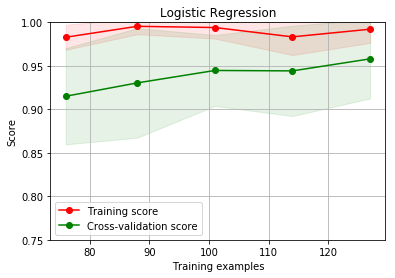

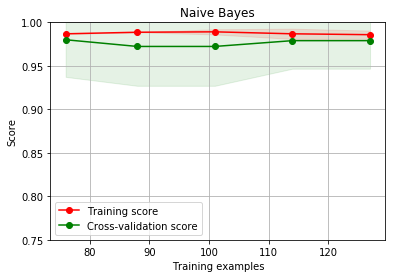

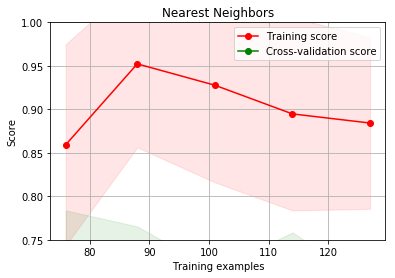

In [25]:
#เทรน classify 3 ตัว
df_results = batch_classify(data_train, label_train, data_test, label_test)
display(df_results.sort_values(by='test_score', ascending=False))

## K-Means
ขั้นตอนการทำคือ
1.Normalization ข้อมูล
2.การทำ K-Means เนื่องจากเรามีหลายตัวแปร จะลดให้เหลือ 7dim และ 4dim ตามลำดับเพื่อเปรียบเทียบกัน

The standard score of a sample x is calculated as:

z = (x - u) / s

In [26]:
X = data[numeric_features].values
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [27]:
# Principal Component Analysi
from sklearn.decomposition import PCA 
pca = PCA(n_components=7)
x_7d = pca.fit_transform(X_std)

In [28]:
pca4 = PCA(n_components=4)
x_4d = pca.fit_transform(X_std)

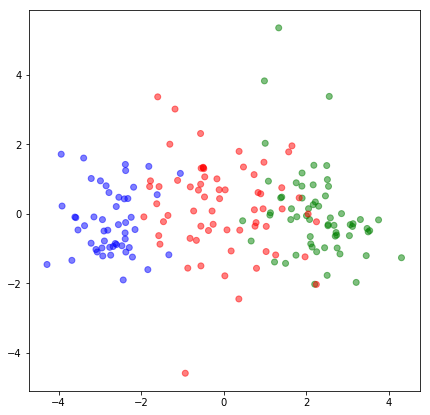

In [29]:
#แบ่งเป็น 3 กลุ่ม แสดงรูปภาพกรณีที่ข้อมูลป็น 7dim
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,2], c= label_color, alpha=0.5) 
plt.show()

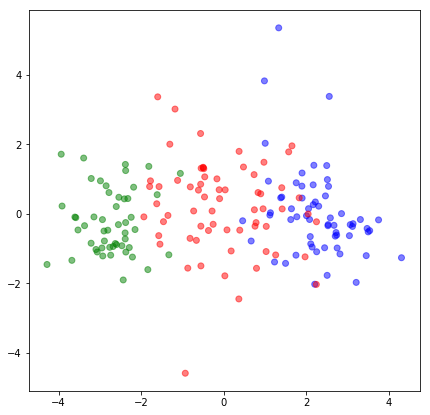

In [30]:
#แบ่งเป็น 3 กลุ่ม แสดงรูปภาพกรณีที่ข้อมูลป็น 4dim
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_4d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,2], c= label_color, alpha=0.5) 
plt.show()